In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import gzip
try:
	import _pickle as pickle #type:ignore
except:
	import pickle

# Loading

In [2]:
from analysis.loading import load_run_data, SAVE_DIR
from analysis.main import compute_run_data, compute_summary_data

In [ ]:
run_name = "multispecies/02_15_2024_16_35_03_1"

for seed in range(5):
    sdata = load_run_data(run_name, seed=seed, return_config=False)
    save_pth = f"{SAVE_DIR}/{run_name}/{seed}_data.zip"
    run_data = compute_run_data(sdata, save_pth=save_pth)

100%|███████████████████████████████████████████████████████████████████████▉| 4999/5000 [00:40<00:00, 122.68it/s]


Computing unique genomes set
Found 1284690 unique genomes
Computing pca projection
		explained variance:  [0.19781896 0.15357774 0.09933908 0.08819495 0.05546803]


100%|████████████████████████████████████████████████████████████████████████| 5000/5000 [00:37<00:00, 134.98it/s]


In [6]:
with gzip.GzipFile(save_pth, "rb") as f:
    data = pickle.load(f)

# Genomes

In [4]:
from analysis.genomes import compute_genome_data, plot_genomes_projection

In [5]:
genome_data = compute_genome_data(data)

Computing unique genomes set
Found 1321719 unique genomes
Computing pca projection
		explained variance:  [0.29758799 0.17829057 0.07762907 0.05569611 0.04644248]


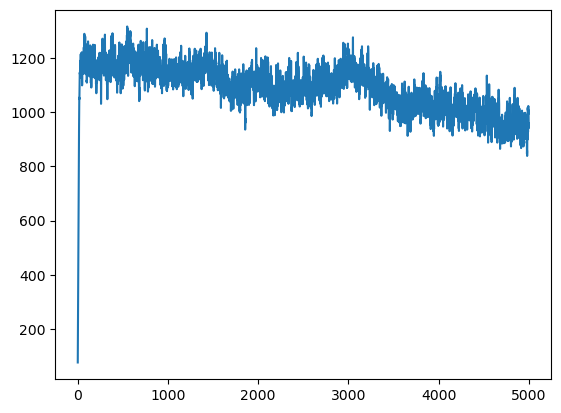

In [6]:
plt.plot([len(upt) for upt in genome_data.uPt])
plt.show()

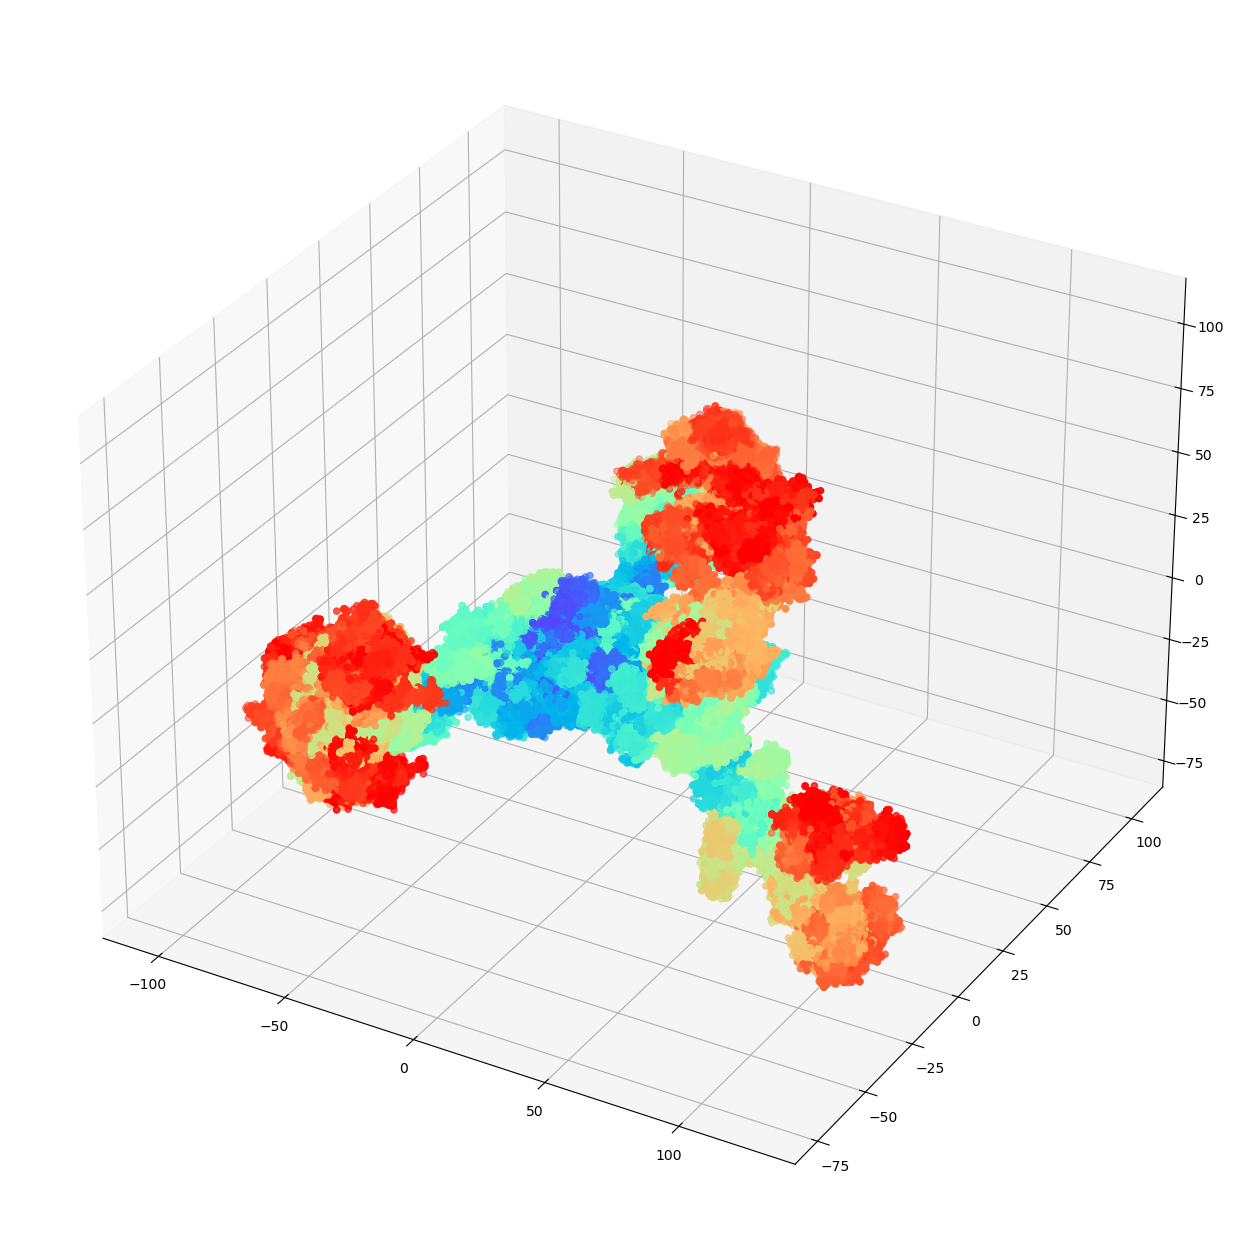

In [38]:
plot_genomes_projection(genome_data, d=3, cmap="rainbow")

# Species

In [6]:
from analysis.species import compute_species_data

In [27]:
species_data = compute_species_data(genome_data)

100%|███████████████████████████████████████████████████████████████████████| 5000/5000 [00:01<00:00, 3154.57it/s]


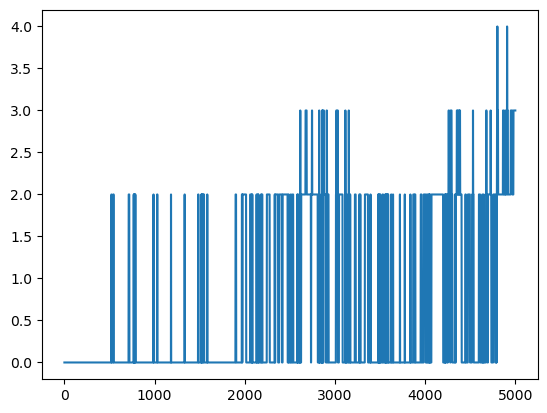

In [37]:
plt.plot(species_data.nSt)
plt.show()

# Evolutionary activity

In [7]:
from analysis.ea import compute_ea_data, plot_ea_data

In [ ]:
ea_data = compute_ea_data(genome_data, return_deltas=False)

 48%|██████████████████████████████████▋                                      | 2379/5000 [00:33<00:32, 81.36it/s]

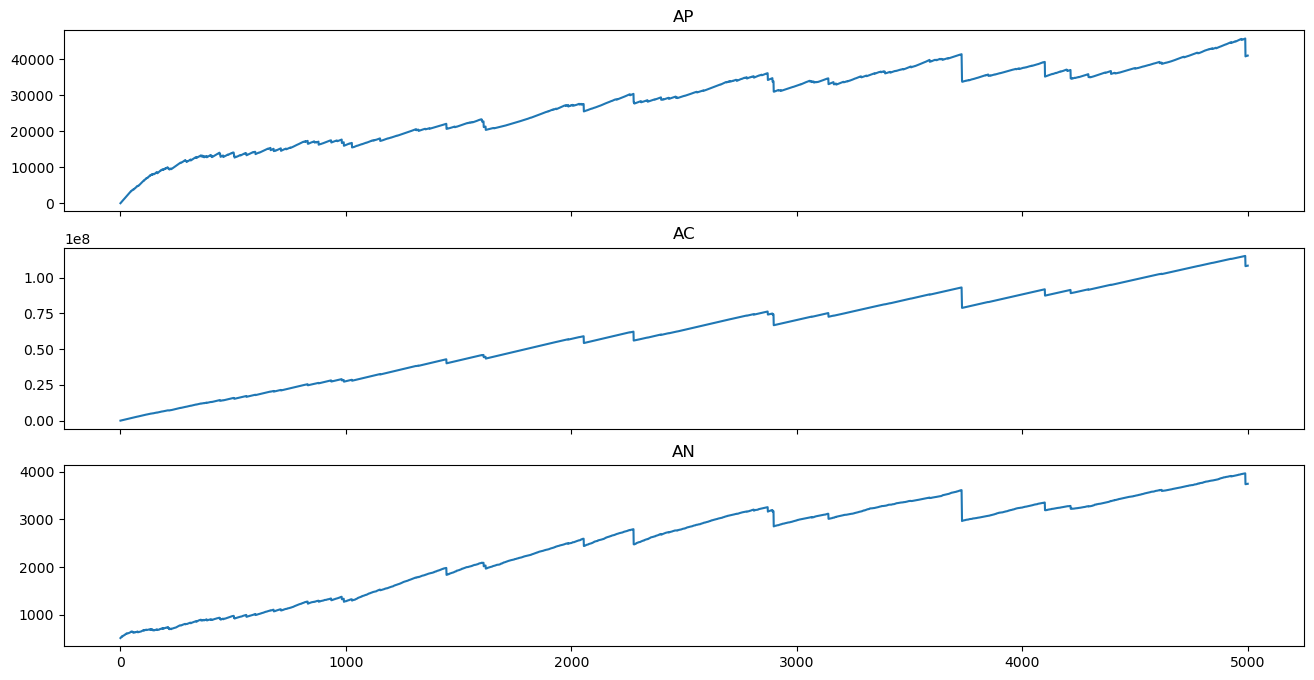

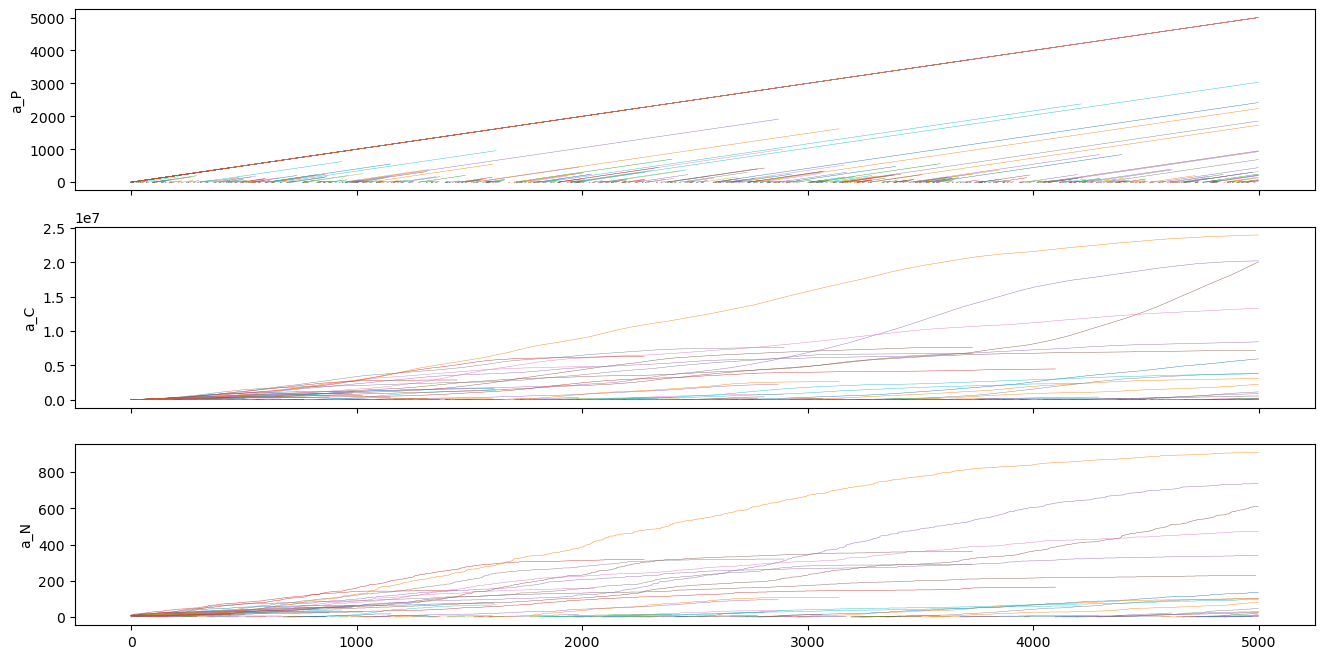

In [30]:
plot_ea_data(ea_data, plot_A=True, plot_a=False, plot_d=False)

# Spatial